# Credit Card Fraud Detection Project

# About Data:
This is a dataset containing credit card transactions with 31 features and a class label. The features represent various aspects of the transaction, and the class label indicates whether the transaction was fraudulent (class 1) or not (class 0).

The first feature is "Time", which represents the number of seconds elapsed between the transaction and the first transaction in the dataset. The next 28 features, V1 to V28, are anonymized variables resulting from a principal component analysis (PCA) transformation of the original features. They represent different aspects of the transaction, such as the amount, location, and type of transaction.

The second last feature is "Amount", which represents the transaction amount in USD. The last feature is the "Class" label, which indicates whether the transaction is fraudulent (class 1) or not (class 0).

Overall, this dataset is used to train machine learning models to detect fraudulent transactions in real-time. The features are used to train the model to learn patterns in the data, which can then be used to detect fraudulent transactions in future transactions.

# Importing libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading data

In [5]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.sample()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
239608,150181.0,0.148389,0.770456,-0.826243,-0.847155,1.218366,-0.034425,0.712327,0.221475,0.092793,...,-0.372233,-1.07748,0.011166,-0.463226,-0.399397,0.159705,0.200222,0.060666,8.99,0


# Exploratory Data Analysis (EDA)

In [7]:
df.shape

(284807, 31)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
print(df.isnull().sum().sum())

0


In [12]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [16]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [25]:
# Class distribution
print(df['Class'].value_counts())
print("\nClass Distribution (%):")
class_dist = df['Class'].value_counts(normalize=True) * 100
print(f"Legitimate: {class_dist[0]:.2f}%")
print(f"Fraudulent: {class_dist[1]:.2f}%")

Class
0    284315
1       492
Name: count, dtype: int64

Class Distribution (%):
Legitimate: 99.83%
Fraudulent: 0.17%


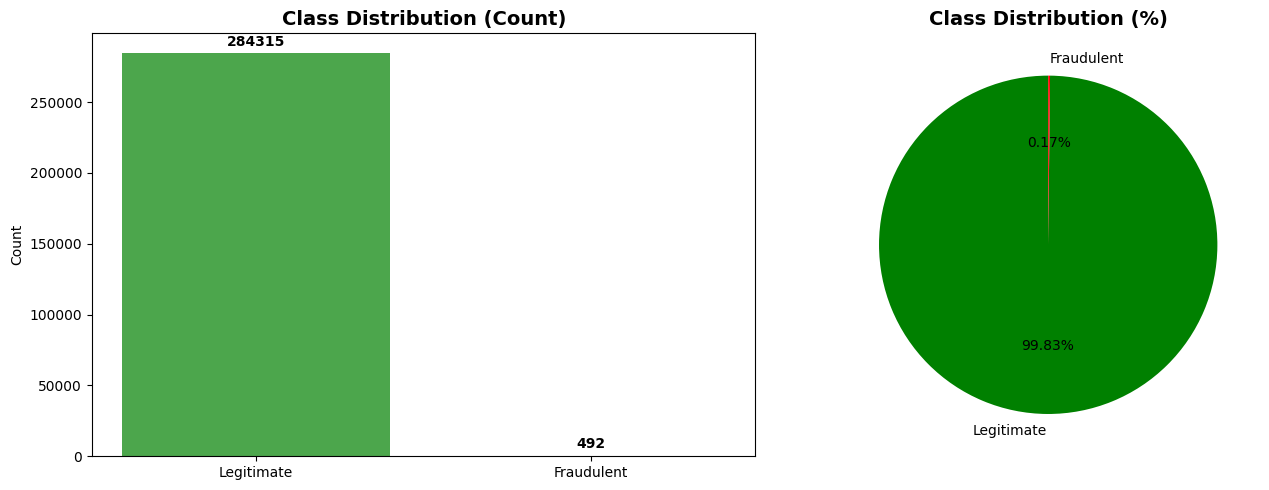

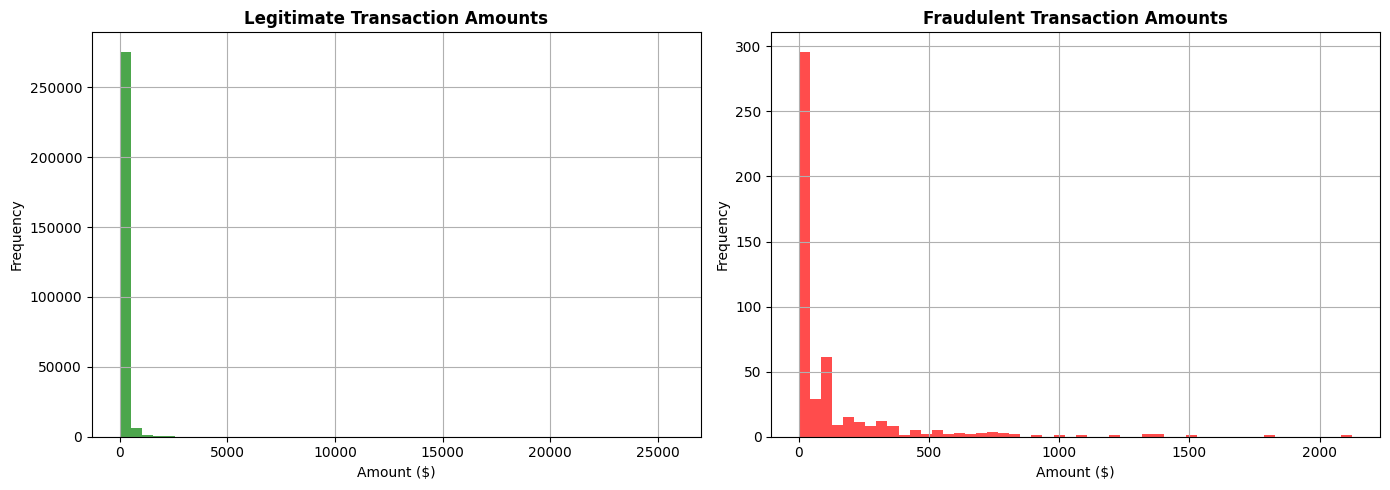

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
counts = df['Class'].value_counts()
axes[0].bar(['Legitimate', 'Fraudulent'], counts.values, color=['green', 'red'], alpha=0.7)
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
for i, v in enumerate(counts.values):
    axes[0].text(i, v + 5000, str(v), ha='center', fontweight='bold')


# Percentage plot
sizes = df['Class'].value_counts()
axes[1].pie(sizes, labels=['Legitimate', 'Fraudulent'], autopct='%1.2f%%',
            colors=['green', 'red'], startangle=90)
axes[1].set_title('Class Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Amount distribution by class
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df[df['Class'] == 0]['Amount'].hist(bins=50, ax=axes[0], color='green', alpha=0.7)
axes[0].set_title('Legitimate Transaction Amounts', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Amount ($)')
axes[0].set_ylabel('Frequency')

df[df['Class'] == 1]['Amount'].hist(bins=50, ax=axes[1], color='red', alpha=0.7)
axes[1].set_title('Fraudulent Transaction Amounts', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Amount ($)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

The first line of code creates a new dataframe called "legit" by selecting only the rows from the original "credit_card_data" dataframe where the "Class" label is equal to 0. In other words, it filters out all transactions labeled as fraudulent (Class == 1) and keeps only the legitimate transactions (Class == 0).

The second line of code creates a new dataframe called "fraud" by selecting only the rows from the original "credit_card_data" dataframe where the "Class" label is equal to 1. This filters out all legitimate transactions and keeps only the fraudulent transactions.

By separating the data into two dataframes, it becomes easier to analyze and compare the characteristics of legitimate and fraudulent transactions separately. This can be useful for identifying patterns or features that are more common in fraudulent transactions, which can then be used to develop models for fraud detection.

In [27]:
legit = df[df.Class==0]
fraud = df[df['Class']==1]

In [28]:
fraud['Class']

541       1
623       1
4920      1
6108      1
6329      1
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 492, dtype: int64

In [30]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [29]:
legit['Class']

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284315, dtype: int64

In [31]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [32]:
# compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Balancing dataset


Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

*legit_sample = legit.sample(n=492)* is a line of code that takes a random sample of 492 observations from the legit dataset. This is done to balance the number of observations in the legit and fraud datasets, which is necessary for training a machine learning model to predict fraud. Since the original dataset has a large number of legitimate transactions and a small number of fraudulent transactions, the model may be biased towards predicting that all transactions are legitimate. By creating a balanced dataset with an equal number of legitimate and fraudulent transactions, the model can be trained to better recognize the patterns that differentiate fraudulent transactions from legitimate ones

In [33]:
legit_sample = legit.sample(n=492)

In [34]:
new_df = pd.concat([legit_sample,fraud],axis=0)
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
192632,129786.0,2.059468,-0.124871,-1.113947,0.400666,-0.159504,-1.111033,0.104825,-0.252003,0.684607,...,-0.299172,-0.763508,0.350100,-0.109088,-0.334924,0.208619,-0.073511,-0.063350,0.89,0
95393,65283.0,1.152302,0.402969,1.054702,2.517406,-0.538552,-0.308695,-0.245025,0.012338,-0.398892,...,0.140259,0.364352,-0.058337,0.388315,0.421803,0.097389,0.009446,0.030141,10.65,0
249868,154616.0,-0.781729,1.262343,-0.462646,-1.103879,1.536482,0.115581,1.435628,-2.202020,-0.015928,...,1.663402,0.186515,-0.353234,0.208319,0.390454,-0.186911,-0.420696,-0.325088,37.78,0
134967,81051.0,1.190770,-1.387425,-0.572325,-1.581099,0.798371,3.803154,-1.574477,0.974702,-0.249638,...,0.324510,0.602132,-0.240827,1.063050,0.575824,-0.043578,0.030880,0.038944,125.00,0
128735,78818.0,0.387356,-2.359150,0.293908,-0.474545,-1.662447,0.402937,-0.643015,0.172472,-0.551386,...,0.717923,0.893359,-0.535528,-0.253747,0.160536,-0.064912,-0.046779,0.090227,490.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [35]:
new_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [36]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94589.500000,-0.101780,-0.095915,-0.041972,-0.042433,0.014433,0.047527,0.063703,0.011349,0.071957,...,-0.039789,-0.010916,-0.038833,0.036672,0.026244,-0.000225,0.021172,0.008111,-0.012223,102.670671
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import (confusion_matrix, classification_report, roc_auc_score,roc_curve, precision_recall_curve, f1_score, auc)

In [37]:
X = new_df.drop(columns='Class', axis=1)
Y = new_df['Class']

In [39]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

# Model Training and Testing


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n{'─'*60}")
    print(f"Training: {name}")
    print(f"{'─'*60}")
    
    # Train on balanced data
    model.fit(X_train, Y_train)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Metrics
    roc_auc = roc_auc_score(Y_test, y_pred_proba)
    f1 = f1_score(Y_test, y_pred)
    
    results[name] = {
        'model': model,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'roc_auc': roc_auc,
        'f1_score': f1
    }
    
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"\nClassification Report:")
    print(classification_report(Y_test, y_pred, target_names=['Legitimate', 'Fraud']))


────────────────────────────────────────────────────────────
Training: Logistic Regression
────────────────────────────────────────────────────────────
ROC-AUC Score: 0.9865
F1-Score: 0.9490

Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.95      0.95      0.95        99
       Fraud       0.95      0.95      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197


────────────────────────────────────────────────────────────
Training: Random Forest
────────────────────────────────────────────────────────────
ROC-AUC Score: 0.9904
F1-Score: 0.9436

Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.94      0.95      0.94        99
       Fraud       0.95      0.94      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      

# Selecting Best Model


In [ ]:
best_model_name = max(results, key=lambda x: results[x]['roc_auc'])
best_model = results[best_model_name]['model']
best_pred_proba = results[best_model_name]['y_pred_proba']

print(f"✓ BEST MODEL: {best_model_name}")
print(f"✓ ROC-AUC Score: {results[best_model_name]['roc_auc']:.4f}")
print(f"✓ F1-Score: {results[best_model_name]['f1_score']:.4f}")

✓ BEST MODEL: Random Forest
✓ ROC-AUC Score: 0.9904
✓ F1-Score: 0.9436


# Visualizing Model Performance

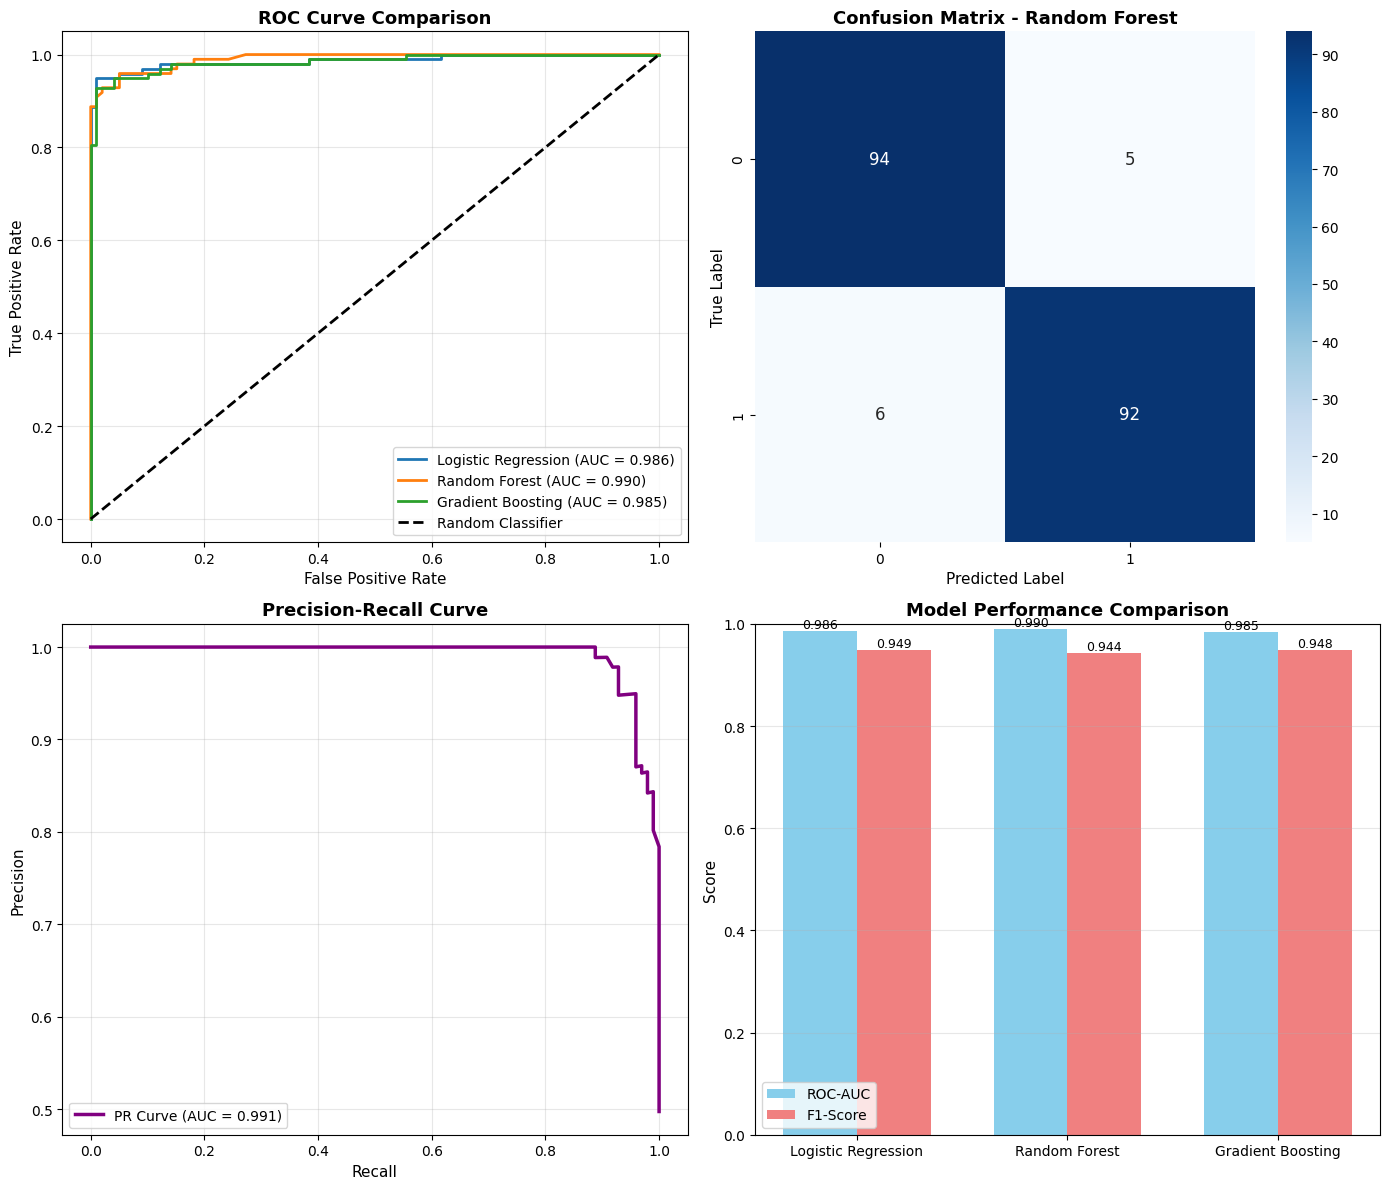

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# 1. ROC Curve Comparison
for name in results.keys():
    fpr, tpr, _ = roc_curve(Y_test, results[name]['y_pred_proba'])
    roc_auc = results[name]['roc_auc']
    axes[0, 0].plot(fpr, tpr, linewidth=2, label=f"{name} (AUC = {roc_auc:.3f})")

axes[0, 0].plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')
axes[0, 0].set_xlabel('False Positive Rate', fontsize=11)
axes[0, 0].set_ylabel('True Positive Rate', fontsize=11)
axes[0, 0].set_title('ROC Curve Comparison', fontsize=13, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(alpha=0.3)

# 2. Confusion Matrix - Best Model
cm = confusion_matrix(Y_test, results[best_model_name]['y_pred'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1], 
            cbar=True, annot_kws={'size': 12})
axes[0, 1].set_title(f'Confusion Matrix - {best_model_name}', fontsize=13, fontweight='bold')
axes[0, 1].set_ylabel('True Label', fontsize=11)
axes[0, 1].set_xlabel('Predicted Label', fontsize=11)

# 3. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(Y_test, best_pred_proba)
pr_auc = auc(recall, precision)
axes[1, 0].plot(recall, precision, linewidth=2.5, color='purple', 
                label=f'PR Curve (AUC = {pr_auc:.3f})')
axes[1, 0].set_xlabel('Recall', fontsize=11)
axes[1, 0].set_ylabel('Precision', fontsize=11)
axes[1, 0].set_title('Precision-Recall Curve', fontsize=13, fontweight='bold')
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(alpha=0.3)

# 4. Model Comparison
model_names = list(results.keys())
roc_scores = [results[name]['roc_auc'] for name in model_names]
f1_scores = [results[name]['f1_score'] for name in model_names]

x = np.arange(len(model_names))
width = 0.35

bars1 = axes[1, 1].bar(x - width/2, roc_scores, width, label='ROC-AUC', color='skyblue')
bars2 = axes[1, 1].bar(x + width/2, f1_scores, width, label='F1-Score', color='lightcoral')

axes[1, 1].set_ylabel('Score', fontsize=11)
axes[1, 1].set_title('Model Performance Comparison', fontsize=13, fontweight='bold')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(model_names, rotation=0, ha='center')
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(axis='y', alpha=0.3)
axes[1, 1].set_ylim([0, 1])

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Optional
### Save this model as a pickle file and integrate/deploy it into web based application like flask